In [1]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

ERROR: Invalid requirement: '#visualizing'


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yinji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yinji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yinji\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yinji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > The circus dog pliss

# Topic Modeling

In [2]:
Tweet = pd.read_csv('Tweets.csv')
United = Tweet[Tweet["airline"] == "United"]
Us_Airways = Tweet[Tweet["airline"] == "US Airways"]
American = Tweet[Tweet["airline"] == "American"]
Southwest = Tweet[Tweet["airline"] == "Southwest"]
Jetblue = Tweet[Tweet["airline"] == "Delta"]
Virgin = Tweet[Tweet["airline"] == "Virgin America"]

In [3]:
All_tweet = Tweet["text"]
United_tweet = United["text"]
Us_Airways_tweet = Us_Airways["text"]
American_tweet = American["text"]
Southwest_tweet = Southwest["text"]
Jetblue_tweet = Jetblue["text"]
Virgin_tweet = Virgin["text"]

In [4]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

## United

In [5]:
#normalize data
normalized_United = normalize_corpus(United_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_United = CountVectorizer(max_features=1000)

#vectorize data
bow_United = bow_vectorizer_United.fit_transform(normalized_United)

In [6]:
lda_United = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_United)

In [7]:
no_top_words_news = 10
display_topics(lda_United, bow_vectorizer_United.get_feature_names(), no_top_words_news)

Topic 0:
united unite bag time check ticket give lose problem first
Topic 1:
united flight unite gate seat plane thanks work people wait
Topic 2:
flight united unite delay hour service late bad cancel cancelled
Topic 3:
unite united http co customer thank service thanks dm help


In [8]:
word_weights = lda_United.components_ / lda_United.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_United.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
1hr,0.000036,0.000576,0.000881,0.000035
1k,0.000038,0.000569,0.000715,0.002700
1st,0.004773,0.000037,0.000027,0.000034
2nd,0.000729,0.000037,0.001021,0.000228
30min,0.000728,0.000038,0.000028,0.000034
3pm,0.000035,0.000752,0.000029,0.000034
3rd,0.000036,0.000037,0.000027,0.001117
5hrs,0.000038,0.000040,0.000029,0.000974
aa,0.001010,0.000036,0.000026,0.000034
able,0.000619,0.000873,0.000364,0.002171


In [9]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
united,0.080633,0.105876,0.086630,0.075348
unite,0.043337,0.028228,0.032819,0.077523
bag,0.042423,0.000037,0.000027,0.000035
time,0.019110,0.009190,0.008395,0.000035
check,0.018578,0.000037,0.000026,0.000035
ticket,0.016486,0.000037,0.000027,0.000035
give,0.016067,0.000037,0.000027,0.000036
lose,0.015650,0.000037,0.000027,0.000035
problem,0.014254,0.000037,0.000027,0.000035
first,0.012164,0.000037,0.000027,0.000034


In [10]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_United, bow_United, bow_vectorizer_United, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  30.712513
3        1.782994 -295.079681       2        1  23.518912
0      220.811432 -343.832123       3        1  23.284237
1       50.533993  -76.050934       4        1  22.484338, topic_info=       Term         Freq        Total Category  logprob  loglift
347  flight  1147.000000  1147.000000  Default  30.0000  30.0000
91      bag   298.000000   298.000000  Default  29.0000  29.0000
169      co   240.000000   240.000000  Default  28.0000  28.0000
436    http   240.000000   240.000000  Default  27.0000  27.0000
235   delay   279.000000   279.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
498   leave    43.877303   101.501480   Topic4  -5.0390   0.6537
306     ewr    39.492175    77.668601   Topic4  -5.1443   0.8160
884    time    62.230070   274.129251   Topic4  -4.6896   0.0096
840   still    44.001540   158.066542   Topic4  -5.0362   0.2136
416    help    44.259330   201.899136   Topic4  -5.0304  -0.0254

[237 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         3  0.964540      1st
16        4  0.976824      add
25        1  0.041380    agent
25        2  0.091036    agent
25        3  0.380694    agent
...     ...       ...      ...
957       1  0.985767  weather
970       4  0.979906     wifi
981       4  0.990842     work
985       1  0.964241    worst
997       1  0.979910       yr

[280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

## US Airways

In [11]:
#normalize data
normalized_US = normalize_corpus(Us_Airways_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_US = CountVectorizer(max_features=1000)

#vectorize data
bow_US = bow_vectorizer_US.fit_transform(normalized_US)

In [12]:
lda_US = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_US)

In [13]:
no_top_words_news = 10
display_topics(lda_US, bow_vectorizer_US.get_feature_names(), no_top_words_news)

Topic 0:
usairways flight hour delay bag plane late gate flightled cancel
Topic 1:
usairways hold call flight hour co http time phone help
Topic 2:
usairways service customer fly thanks thank bad airline never today
Topic 3:
usairways help seat work reservation thanks number need please people


In [14]:
word_weights = lda_US.components_ / lda_US.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_US.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
1hr,0.000421,0.000044,0.000575,0.000043
1st,0.001570,0.000046,0.000048,0.002819
2hrs,0.000667,0.000520,0.000050,0.000043
2nd,0.001084,0.000056,0.000474,0.000045
2x,0.000167,0.000887,0.000048,0.000043
30pm,0.000409,0.000715,0.000049,0.000043
3rd,0.000468,0.000286,0.000048,0.000043
8pm,0.000032,0.000044,0.000800,0.000043
aa,0.000031,0.000721,0.000048,0.004985
aadvantage,0.000031,0.000504,0.000047,0.000270


In [15]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
usairways,0.102619,0.109221,0.138999,0.130289
flight,0.098027,0.029450,0.009775,0.000045
hour,0.022148,0.029200,0.000049,0.000044
delay,0.021025,0.000045,0.004128,0.000043
bag,0.019145,0.000045,0.000050,0.000044
plane,0.018791,0.000045,0.000049,0.004449
late,0.013667,0.000045,0.000048,0.000044
gate,0.013580,0.000044,0.000049,0.005943
flightled,0.013546,0.000045,0.000048,0.000043
cancel,0.013180,0.000045,0.000048,0.000043


In [16]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_US, bow_US, bow_vectorizer_US, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  32.338359
3        1.782994 -295.079681       2        1  23.358358
1      220.811432 -343.832123       3        1  23.168573
2       50.533993  -76.050934       4        1  21.134710, topic_info=         Term        Freq       Total Category  logprob  loglift
353    flight  980.000000  980.000000  Default  30.0000  30.0000
787   service  236.000000  236.000000  Default  29.0000  29.0000
219  customer  223.000000  223.000000  Default  28.0000  28.0000
133      call  220.000000  220.000000  Default  27.0000  27.0000
429      hold  293.000000  293.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
201     could   29.270980   71.988662   Topic4  -5.1615   0.6543
401      good   28.894476   79.970887   Topic4  -5.1745   0.5362
888      time   36.617907  215.466297   Topic4  -4.9376  -0.2180
353    flight   49.910851  980.814105   Topic4  -4.6279  -1.4239
32      agent   29.445212   97.203279   Topic4  -5.1556   0.3600

[239 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
8         2  0.857503     aa
8         3  0.122500     aa
32        1  0.195467  agent
32        2  0.216042  agent
32        3  0.288056  agent
...     ...       ...    ...
966       4  0.297295   well
980       2  0.902679   work
980       3  0.092582   work
983       3  0.955519  worst
995       2  0.991683    yes

[279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

## American

In [17]:
#normalize data
normalized_American = normalize_corpus(American_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_American = CountVectorizer(max_features=1000)

#vectorize data
bow_American = bow_vectorizer_American.fit_transform(normalized_American)

In [18]:
lda_American = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_American)

In [19]:
no_top_words_news = 10
display_topics(lda_American, bow_vectorizer_American.get_feature_names(), no_top_words_news)

Topic 0:
americanair flight plane flightled cancelled cancel dfw fly thank delay
Topic 1:
americanair service customer thanks time agent call response usairways hang
Topic 2:
americanair wait bag still hour late hold flight lose luggage
Topic 3:
americanair flight help call co http change please need aa


In [20]:
word_weights = lda_American.components_ / lda_American.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_American.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
10pm,0.000035,0.000051,0.001159,0.000036
1am,0.000169,0.000055,0.000087,0.000312
1hr,0.000732,0.000048,0.000072,0.000037
1st,0.001567,0.000052,0.000075,0.000036
24hrs,0.000036,0.000051,0.000069,0.000602
2hrs,0.000731,0.000048,0.000072,0.000036
2nd,0.000870,0.000052,0.000068,0.000037
30am,0.000312,0.000628,0.000070,0.000037
3rd,0.000174,0.000050,0.000070,0.000461
5th,0.000548,0.000049,0.000430,0.000036


In [21]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
americanair,0.120265,0.133406,0.106610,0.118125
flight,0.073203,0.000050,0.020530,0.044350
plane,0.019191,0.000050,0.000073,0.000036
flightled,0.018804,0.000049,0.000070,0.004279
cancelled,0.018679,0.000050,0.000070,0.002126
cancel,0.016549,0.000049,0.000070,0.008713
dfw,0.015352,0.000050,0.008128,0.000037
fly,0.015137,0.000049,0.000070,0.000036
thank,0.013876,0.000051,0.000071,0.000037
delay,0.012988,0.000051,0.008649,0.000036


In [22]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_American, bow_American, bow_vectorizer_American, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  30.691522
3        1.782994 -295.079681       2        1  30.180651
1      220.811432 -343.832123       3        1  22.582685
2       50.533993  -76.050934       4        1  16.545142, topic_info=         Term        Freq       Total Category  logprob  loglift
784   service  194.000000  194.000000  Default  30.0000  30.0000
224  customer  193.000000  193.000000  Default  29.0000  29.0000
435      help  224.000000  224.000000  Default  28.0000  28.0000
364    flight  863.000000  863.000000  Default  27.0000  27.0000
104       bag  137.000000  137.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
257       dfw   29.594929  133.780889   Topic4  -4.8124   0.2905
944      want   23.381711   66.431993   Topic4  -5.0480   0.7549
310      even   23.299099   69.522538   Topic4  -5.0516   0.7058
411      good   22.768921   79.062557   Topic4  -5.0746   0.5542
101       bad   22.039050   92.772219   Topic4  -5.1072   0.3617

[259 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  0.968901        1st
12        1  0.276446         aa
12        2  0.474765         aa
12        3  0.192310         aa
12        4  0.054087         aa
...     ...       ...        ...
992       1  0.951965       year
995       1  0.219707  yesterday
995       4  0.768975  yesterday
996       3  0.754279        yet
996       4  0.251426        yet

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

## Southwest

In [23]:
#normalize data
normalized_Southwest = normalize_corpus(Southwest_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_Southwest = CountVectorizer(max_features=1000)

#vectorize data
bow_Southwest = bow_vectorizer_Southwest.fit_transform(normalized_Southwest)

In [24]:
lda_Southwest = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_Southwest)

In [25]:
no_top_words_news = 10
display_topics(lda_Southwest, bow_vectorizer_Southwest.get_feature_names(), no_top_words_news)

Topic 0:
southwestair thanks thank destinationdragons great dm love send airline follow
Topic 1:
southwestair flight co http cancel cancelled flightled today hold hour
Topic 2:
southwestair flight time fly late delay seat book next plane
Topic 3:
southwestair service customer hour hold help call phone wait minute


In [26]:
word_weights = lda_Southwest.components_ / lda_Southwest.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_Southwest.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
1st,0.001319,0.000868,0.000052,0.000056
2nd,0.000050,0.000060,0.000049,0.001352
3rd,0.000050,0.000057,0.001792,0.000056
80s,0.000052,0.000056,0.000628,0.000055
8aug,0.000050,0.000056,0.001019,0.000054
8wbzorrn3c,0.000649,0.000058,0.000049,0.000054
a1,0.000447,0.000060,0.000242,0.000054
aarp,0.000053,0.000718,0.000049,0.000058
able,0.002168,0.000058,0.000052,0.002310
absolutely,0.000058,0.000564,0.000956,0.000057


In [27]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
southwestair,0.158891,0.115261,0.114368,0.114225
thanks,0.038288,0.000058,0.000050,0.000056
thank,0.029680,0.000057,0.000049,0.000056
destinationdragons,0.016667,0.000057,0.000049,0.000055
great,0.013861,0.000058,0.000050,0.000056
dm,0.013663,0.000057,0.000049,0.000056
love,0.013194,0.006388,0.000050,0.000055
send,0.012461,0.000056,0.000049,0.000057
airline,0.011650,0.007659,0.000051,0.000058
follow,0.011061,0.000057,0.000049,0.000055


In [28]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_Southwest, bow_Southwest, bow_vectorizer_Southwest, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  26.826883
0        1.782994 -295.079681       2        1  25.534622
3      220.811432 -343.832123       3        1  24.141769
1       50.533993  -76.050934       4        1  23.496725, topic_info=          Term        Freq       Total Category  logprob  loglift
330     flight  749.000000  749.000000  Default  30.0000  30.0000
154         co  206.000000  206.000000  Default  29.0000  29.0000
425       http  204.000000  204.000000  Default  28.0000  28.0000
875     thanks  178.000000  178.000000  Default  27.0000  27.0000
774    service  140.000000  140.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
938        use   23.360323   51.437732   Topic4  -5.2115   0.6590
821  southwest   26.671853   73.402099   Topic4  -5.0789   0.4360
403       help   34.922556  159.734360   Topic4  -4.8094  -0.0721
577       need   28.744203  101.644384   Topic4  -5.0041   0.1853
520       love   27.363263   89.264424   Topic4  -5.0533   0.2659

[240 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
10        4  0.915442   accept
22        3  0.985481      ago
26        2  0.616845  airline
26        4  0.376961  airline
28        1  0.547830  airport
...     ...       ...      ...
982       2  0.417153     work
982       4  0.173814     work
993       1  0.978467     yeah
995       3  0.290484      yes
995       4  0.697161      yes

[290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

## Jetblue

In [29]:
#normalize data
normalized_Jetblue = normalize_corpus(Jetblue_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_Jetblue = CountVectorizer(max_features=1000)

#vectorize data
bow_Jetblue = bow_vectorizer_Jetblue.fit_transform(normalized_Jetblue)

In [30]:
lda_Jetblue = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_Jetblue)

In [31]:
no_top_words_news = 10
display_topics(lda_Jetblue, bow_vectorizer_Jetblue.get_feature_names(), no_top_words_news)

Topic 0:
http co jetblue fleek fleet rt ceo new wall jetblues
Topic 1:
jetblue fly flight great thanks time love service look guy
Topic 2:
jetblue thanks thank service good much customer yes response email
Topic 3:
jetblue flight delay jfk hour plane still time wait gate


In [32]:
word_weights = lda_Jetblue.components_ / lda_Jetblue.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_Jetblue.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
15th,0.001686,0.000047,0.000082,0.000043
1st,0.000099,0.001243,0.000084,0.001009
2nd,0.000101,0.001533,0.000083,0.000045
4th,0.000099,0.000048,0.000082,0.000562
6am,0.000099,0.000047,0.000083,0.000563
a320,0.001984,0.000048,0.001140,0.000044
aa,0.000099,0.000604,0.000082,0.000044
abc,0.000099,0.000977,0.000083,0.000044
able,0.000100,0.001850,0.001161,0.000045
absolute,0.000099,0.000057,0.000082,0.000554


In [33]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
co,0.154070,0.000047,0.000082,0.000044
http,0.154070,0.000047,0.000082,0.000044
jetblue,0.118727,0.147106,0.174810,0.124659
fleek,0.060418,0.000047,0.000082,0.000043
fleet,0.058038,0.000047,0.000082,0.000043
rt,0.025098,0.000047,0.000082,0.000043
ceo,0.013194,0.000047,0.000082,0.000044
new,0.012888,0.003258,0.000086,0.002389
wall,0.012004,0.000047,0.000082,0.000043
jetblues,0.012002,0.000047,0.000083,0.000044


In [34]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_Jetblue, bow_Jetblue, bow_vectorizer_Jetblue, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      269.562408 -124.803398       1        1  34.181104
1        1.782994 -295.079681       2        1  31.681471
2      220.811432 -343.832123       3        1  18.447228
0       50.533993  -76.050934       4        1  15.690197, topic_info=                Term        Freq       Total Category  logprob  loglift
425             http  380.000000  380.000000  Default  30.0000  30.0000
171               co  380.000000  380.000000  Default  29.0000  29.0000
331           flight  544.000000  544.000000  Default  28.0000  28.0000
328            fleek  149.000000  149.000000  Default  27.0000  27.0000
329            fleet  143.000000  143.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
665           please   13.981230   52.218991   Topic4  -5.1726   0.5344
992             year   11.594697   31.213406   Topic4  -5.3598   0.8618
739            right    8.563207   49.150409   Topic4  -5.6628   0.1047
345  flyingitforward    7.332635   12.466115   Topic4  -5.8180   1.3215
127         business    7.101047   18.082166   Topic4  -5.8501   0.9175

[230 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
13        2  0.933300   access
14        2  0.933387  account
18        3  0.960525  address
20        2  0.876324    agent
20        3  0.119499    agent
...     ...       ...      ...
985       4  0.772803      wow
992       2  0.608713     year
992       4  0.384450     year
994       3  0.992508      yes
996       1  0.978911      yet

[277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

## Virgin

In [35]:
#normalize data
normalized_Virgin = normalize_corpus(Virgin_tweet)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_Virgin = CountVectorizer(max_features=1000)

#vectorize data
bow_Virgin = bow_vectorizer_Virgin.fit_transform(normalized_Virgin)

In [36]:
lda_Virgin = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_Virgin)

In [37]:
no_top_words_news = 50
display_topics(lda_Virgin, bow_vectorizer_Virgin.get_feature_names(), no_top_words_news)

Topic 0:
virginamerica co http carrieunderwood ladygaga route dallas flight look austin share dal way year site deal airline week like love elevate check best add last view country start second take book today atlantic via bag lone middleeast thenationaluae plough furrow night julie andrew result beat dallaslovefield aus guy may plan
Topic 1:
virginamerica flight fly love website sfo help thank site seat way check book time flightled wait miss cool cancelled trip lax cancel jfk problem still guy look email need experience city work next airline lot pay plane today please best may change dallas team another business luggage really deal know
Topic 2:
virginamerica co http flight thanks fly service customer help airline need virgin seat awesome time first great new la add us good sfo guy use free call hour lax like home point much love nyc change think website online together rt phone ever check today take let mobile travel really
Topic 3:
virginamerica status week day flight call match e

In [38]:
word_weights = lda_Virgin.components_ / lda_Virgin.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_Virgin.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(4)])

In [39]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
virginamerica,0.088134,0.116223,0.103196,0.074619
co,0.073382,0.000128,0.014897,0.000361
http,0.072404,0.000128,0.014842,0.000361
carrieunderwood,0.014048,0.000127,0.000175,0.000352
ladygaga,0.012987,0.000127,0.000175,0.000352
route,0.011904,0.000130,0.000177,0.000369
dallas,0.009189,0.003674,0.000178,0.002570
flight,0.008292,0.056644,0.013213,0.013311
look,0.007882,0.005087,0.000181,0.000369
austin,0.007199,0.000129,0.000175,0.009450


In [40]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_Virgin, bow_Virgin, bow_vectorizer_Virgin, mds='tsne')


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  40.549059
2        1.782994 -295.079681       2        1  28.623767
0      220.811432 -343.832123       3        1  17.974536
3       50.533993  -76.050934       4        1  12.852639, topic_info=                Term       Freq      Total Category  logprob  loglift
144               co  71.000000  71.000000  Default  30.0000  30.0000
317             http  70.000000  70.000000  Default  29.0000  29.0000
750           status  11.000000  11.000000  Default  28.0000  28.0000
944             week  12.000000  12.000000  Default  27.0000  27.0000
103  carrieunderwood  10.000000  10.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
299              guy   2.876913  20.088791   Topic4  -5.1996   0.1082
406             need   2.782495  21.825807   Topic4  -5.2330  -0.0081
266              fly   2.873681  40.910145   Topic4  -5.2007  -0.6042
757            still   2.482427  12.934555   Topic4  -5.3471   0.4010
350              lax   2.493410  17.007560   Topic4  -5.3427   0.1316

[258 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
8         1  0.283993        add
8         2  0.397591        add
8         3  0.227195        add
8         4  0.113597        add
10        4  0.885894  afternoon
...     ...       ...        ...
969       3  0.174639       work
972       2  0.742687      worry
991       1  0.342724       year
991       2  0.114241       year
991       3  0.456966       year

[315 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

# Sentiment

In [42]:
import pandas as pd
import io
df = pd.read_csv('Tweets.csv')
print(df)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [43]:
reviews = df["text"]
reviews

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [44]:
train_data = df.iloc[:10000]
train_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,569585747503611905,negative,1.0000,Customer Service Issue,0.6861,US Airways,NaN,sejaffe,NaN,0,@USAirways @AmericanAir seriously with all the...,NaN,2015-02-22 11:53:19 -0800,NaN,NaN
9996,569584885108748290,negative,1.0000,Late Flight,0.3787,US Airways,NaN,AndrewTV,NaN,0,@USAirways Flight 4210 been sitting @Bradley_A...,NaN,2015-02-22 11:49:53 -0800,"Pittsfield, MA",Eastern Time (US & Canada)
9997,569584719089836032,positive,1.0000,NaN,NaN,US Airways,NaN,mc3h2,NaN,0,@USAirways new F/As from DFW to CLT this morni...,NaN,2015-02-22 11:49:14 -0800,The 27th State,Eastern Time (US & Canada)
9998,569584207011434497,negative,1.0000,Bad Flight,0.6442,US Airways,NaN,ericabevill,NaN,0,@USAirways why have me board a plane knowing t...,NaN,2015-02-22 11:47:11 -0800,"Chicago, IL",Central Time (US & Canada)


In [45]:
test_data = df.iloc[10000:]
test_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10000,569583725408870401,negative,1.0000,Cancelled Flight,0.6313,US Airways,NaN,drewdenker,NaN,0,@USAirways waiting all day at ATL since flight...,NaN,2015-02-22 11:45:17 -0800,NaN,NaN
10001,569583698640818176,negative,1.0000,Customer Service Issue,0.6767,US Airways,NaN,sebastian_mcfox,NaN,0,@USAirways the link doesn't work..,NaN,2015-02-22 11:45:10 -0800,NaN,NaN
10002,569581828258078721,negative,1.0000,Cancelled Flight,1.0000,US Airways,NaN,MrRenevendez,NaN,0,@USAirways spent 1.5 hours in line trying to g...,NaN,2015-02-22 11:37:44 -0800,Where you least need me to be,NaN
10003,569581400850096128,negative,1.0000,Late Flight,1.0000,US Airways,NaN,CaseyRhoades1,NaN,0,@USAirways flight 838 now leaving after 6 hour...,NaN,2015-02-22 11:36:02 -0800,"Madbury, NH",NaN
10004,569580275182772225,negative,1.0000,Cancelled Flight,1.0000,US Airways,NaN,MrRenevendez,NaN,0,@USAirways care to elaborate on why CHA to DCA...,NaN,2015-02-22 11:31:34 -0800,Where you least need me to be,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [46]:
#split the training and testing dataframes into two dataframes, consisting of the respective columns:
test_reviews = np.array(test_data['text'])
test_polarity = np.array(test_data['airline_sentiment'])

train_reviews = np.array(train_data['text'])
train_polarity = np.array(train_data['airline_sentiment'])

In [47]:
#Normalize the text for reviews and name the normalized corpora of review texts normalized_test_reviews and normalized_train_reviews:
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yinji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [50]:
#VADER Lexicon-Based Sentiment Analysis of Tweets Reviews
#create a function that scores text using VADER lexicon and prints the actual and scored sentiment.
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [51]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,negative,-0.4939
1,negative,0.0000
2,negative,-0.2500
3,negative,-0.3182
4,positive,0.2960


In [52]:
#Since we have human-created labels for sentiment polarity in our data (positive/negative), we can compute the accuracy rate for the binary sentiment prediction that we computed using the VADER lexicon, conditional on the threshold value of 0.1 (for classifying sentiment as just positive or negative; no neutral). The accuracy rate:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_polarity, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.641 



In [53]:
#Confusion matrix
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,2499,920,3419
neutral,395,296,691
positive,57,473,530
All,2951,1689,4640


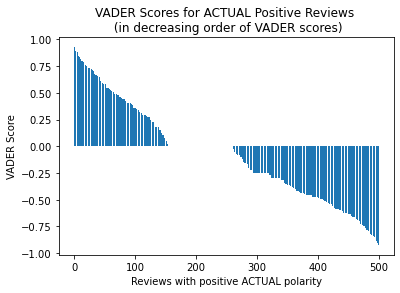

In [54]:
#Have a look at raw VADER scores assigned to actual positive reviews (we sort the reviews by the VADER score in a decreasing order):
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

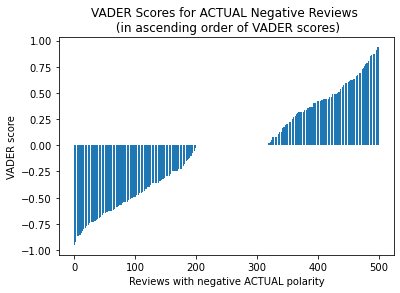

In [55]:
#Now, have a look at VADER scores assigned to actual negative reviews (we sort the reviews by the VADER score in a decreasing order):
neg_reviews_scored = VADER_polarity_test_df[500:1000]['VADER Score']
plt.bar(range(0, 500), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

In [56]:
#adjusting the threshold parameter,and looking for the threshold value that gives us the highest accuracy rate.
#Define a function that computes accuracy rate for different value of the threshold and call that function try_threshold_for_accuracy. 
#The function will take the VADER score and the threshold parameter as inputs and return the accuracy rate, associated with the inputs:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy) 

In [57]:
#apply this function to score the movie reviews using the threshold value = 0.5:
threshold = 0.5
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))
#Note: higher than 0.64 

Accuracy rate:  0.7334051724137931


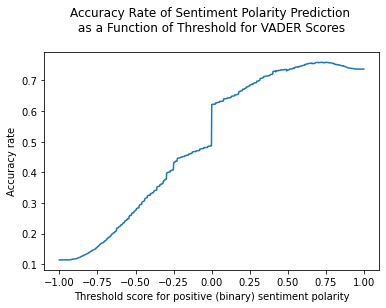

In [58]:
#Now, let's explore the changes in accuracy rate for a range of thresholds from -1 to 1 (that is VADER score's range):
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [59]:
threshold = 0.75
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))

Accuracy rate:  0.7588362068965517


In [60]:
#the threshold value that maximizes the prediction accuracy rate
optimal_threshold = thresholds[acc_rates.index(max(acc_rates))]
print(optimal_threshold)
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],optimal_threshold))

0.7237237237237237
Accuracy rate:  0.7592672413793103


## SVM Model

In [61]:
#Trainning own sentimental classifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

In [62]:
#Have a look at the feature matrix with unigrams and bi-grams for the training data and note the n-grams:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,000ft,000ft bluecarpet,00pm,00pm 40pm,00pm none,00pm sunday,01ldxn3qqq,01pm,01pm still,05am,...,zukes,zukes non,zurich,zurich bc,zurich credit,zurich zrh,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Vectorize test data using the features created based on the training data:
feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)

In [64]:
#Let's use Support Vector Machines (SVM) to train our custom sentiment classifier:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, train_polarity)
predicted_svm = svm.predict(feature_matrix_TEST) 

In [65]:
print('Accuracy rate:', np.round(metrics.accuracy_score(test_polarity, predicted_svm), 3))

Accuracy rate: 0.817


In [66]:
sample_ids = [0, 30, 33] 
for doc_index in sample_ids:
    print('Review:-')
    print(test_reviews[doc_index])
    print('\nActual Labeled Sentiment:', test_polarity[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print('-'*60)

Review:-
@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL

Actual Labeled Sentiment: negative
Predicted Sentiment: negative
------------------------------------------------------------
Review:-
@USAirways you should get better employees✌️

Actual Labeled Sentiment: negative
Predicted Sentiment: negative
------------------------------------------------------------
Review:-
@USAirways @MrRenevendez I've been trying to contact them for 24 hours already! Yesterday I waited 7 hours today 5+! http://t.co/gn30p75KqB

Actual Labeled Sentiment: negative
Predicted Sentiment: negative
------------------------------------------------------------


In [67]:
print(predicted_svm)
len(predicted_svm)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


4640

In [68]:
predicted_svm_test = svm.predict(feature_matrix_TEST)
predicted_svm_train = svm.predict(feature_matrix_TRAIN)
print(predicted_svm_test)
print(predicted_svm_train)
type(predicted_svm_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['neutral' 'positive' 'neutral' ... 'positive' 'negative' 'neutral']


numpy.ndarray

In [69]:
predicted_sentiment = np.append(predicted_svm_train, predicted_svm_test)
print(predicted_sentiment)
len(predicted_sentiment)

['neutral' 'positive' 'neutral' ... 'negative' 'negative' 'negative']


14640

In [70]:
df.insert(loc=len(df.columns),column = "predicted_sentiment", value=predicted_sentiment)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,predicted_sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),positive
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,positive
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,negative
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,negative
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),negative


In [71]:
df_VirginAmerica = df[(df['airline']=="Virgin America")]
#print(type(df_VirginAmerica))
#print(df['airline'].unique())
print("Number of sentiments for VA")
num_sen_VA = df_VirginAmerica['predicted_sentiment'].value_counts()
#print(df['airline'].unique())
print(num_sen_VA)

Number of sentiments for VA
negative    184
neutral     171
positive    149
Name: predicted_sentiment, dtype: int64


In [72]:
df_United = df[(df['airline']=="United")]
num_sen_United = df_United['predicted_sentiment'].value_counts()
print("Number of sentiments for United:")
num_sen_United

Number of sentiments for United:


negative    2728
neutral      614
positive     480
Name: predicted_sentiment, dtype: int64

In [73]:
df_Southwest = df[(df['airline']=="Southwest")]
num_sen_Southwest = df_Southwest['predicted_sentiment'].value_counts()
print("Number of sentiments for Southwest:")
num_sen_Southwest

Number of sentiments for Southwest:


negative    1208
neutral      633
positive     579
Name: predicted_sentiment, dtype: int64

In [74]:
df_Delta = df[(df['airline']=="Delta")]
num_sen_Delta = df_Delta['predicted_sentiment'].value_counts()
print("Number of sentiments for JetBlue:")
num_sen_Delta

Number of sentiments for JetBlue:


negative    959
neutral     722
positive    541
Name: predicted_sentiment, dtype: int64

In [75]:
df_US_Airways = df[(df['airline']=="US Airways")]
num_sen_US_Airways = df_US_Airways['predicted_sentiment'].value_counts()
print("Number of sentiments for US Airways:")
num_sen_US_Airways

Number of sentiments for US Airways:


negative    2477
positive     223
neutral      213
Name: predicted_sentiment, dtype: int64

In [76]:
df_American = df[(df['airline']=="American")]
num_sen_American = df_American['predicted_sentiment'].value_counts()
print("Number of sentiments for American:")
num_sen_American

Number of sentiments for American:


negative    2264
positive     306
neutral      189
Name: predicted_sentiment, dtype: int64